### Ordinal encoding

In [1]:
import numpy as np
import re
def string_to_array(seq_string):
   seq_string = seq_string.lower()
   seq_string = re.sub('[^acgt]', 'n', seq_string)
   seq_string = np.array(list(seq_string))
   return seq_string
# create a label encoder with 'acgtn' alphabet
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(np.array(['a','c','g','t','z']))

LabelEncoder()

In [2]:
def ordinal_encoder(my_array):
    integer_encoded = label_encoder.transform(my_array)
    float_encoded = integer_encoded.astype(float)
    float_encoded[float_encoded == 0] = 0.25 # A
    float_encoded[float_encoded == 1] = 0.50 # C
    float_encoded[float_encoded == 2] = 0.75 # G
    float_encoded[float_encoded == 3] = 1.00 # T
    float_encoded[float_encoded == 4] = 0.00 # anything else, lets say n
    return float_encoded


#Let’s try it out a simple short sequence:
seq_test = 'TTCAGCCAGTG'
ordinal_encoder(string_to_array(seq_test))

array([1.  , 1.  , 0.5 , 0.25, 0.75, 0.5 , 0.5 , 0.25, 0.75, 1.  , 0.75])

### One-hot encoding DNA Sequence

In [8]:
from sklearn.preprocessing import OneHotEncoder
def one_hot_encoder(seq_string):
    int_encoded = label_encoder.transform(seq_string)
    onehot_encoder = OneHotEncoder(sparse=False, dtype=int)
    int_encoded = int_encoded.reshape(len(int_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(int_encoded)
    onehot_encoded = np.delete(onehot_encoded, -1, 1)
    return onehot_encoded


#So let’s try it out with a simple short sequence:
seq_test = 'GAATTCTCGAA'
one_hot_encoder(string_to_array(seq_test))

array([[0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])

### DNA sequence as a “language”, known as k-mer counting

In [9]:
def Kmers_funct(seq, size):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]


#So let’s try it out with a simple sequence:
mySeq = 'GTGCCCAGGTTCAGTGAGTGACACAGGCAG'
Kmers_funct(mySeq, size=7)

['gtgccca',
 'tgcccag',
 'gcccagg',
 'cccaggt',
 'ccaggtt',
 'caggttc',
 'aggttca',
 'ggttcag',
 'gttcagt',
 'ttcagtg',
 'tcagtga',
 'cagtgag',
 'agtgagt',
 'gtgagtg',
 'tgagtga',
 'gagtgac',
 'agtgaca',
 'gtgacac',
 'tgacaca',
 'gacacag',
 'acacagg',
 'cacaggc',
 'acaggca',
 'caggcag']

In [10]:
words = Kmers_funct(mySeq, size=6)
joined_sentence = ' '.join(words)
joined_sentence

'gtgccc tgccca gcccag cccagg ccaggt caggtt aggttc ggttca gttcag ttcagt tcagtg cagtga agtgag gtgagt tgagtg gagtga agtgac gtgaca tgacac gacaca acacag cacagg acaggc caggca aggcag'

In [11]:
mySeq1 = 'TCTCACACATGTGCCAATCACTGTCACCC'
mySeq2 = 'GTGCCCAGGTTCAGTGAGTGACACAGGCAG'
sentence1 = ' '.join(Kmers_funct(mySeq1, size=6))
sentence2 = ' '.join(Kmers_funct(mySeq2, size=6))

#Creating the Bag of Words model:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform([joined_sentence, sentence1, sentence2]).toarray()
X

array([[0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 0, 0, 1],
       [1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
        1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 0, 0, 1]], dtype=int64)

# Processing on data

In [13]:
conda list matplotlib

# packages in environment at C:\Users\Vharsha\anaconda3:
#
# Name                    Version                   Build  Channel
matplotlib                3.5.1            py39haa95532_1  
matplotlib-base           3.5.1            py39hd77b12b_1  
matplotlib-inline         0.1.2              pyhd3eb1b0_2  

Note: you may need to restart the kernel to use updated packages.


In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
%matplotlib inline
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
#### human data set

In [2]:
# importing library
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import os
import matplotlib.pyplot as plt


In [3]:
# Importing all the data sets
human_dna=pd.read_table(r"C:\Users\Vharsha\Downloads\human.txt")
dog_dna=pd.read_table(r"C:\Users\Vharsha\Downloads\dog.txt")
chimpanzee_dna=pd.read_table(r"C:\Users\Vharsha\Downloads\chimpanzee.txt")

In [4]:
#show first 5 rows in human dataset
human_dna.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


Text(0.5, 1.0, 'Class distribution of Human NA')

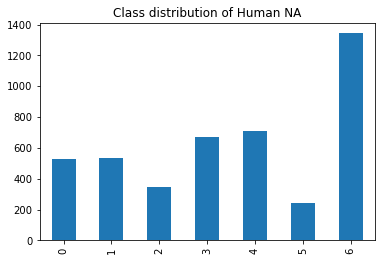

In [32]:
#display how many DNA sequences in each class of a human data set?
human_dna['class'].value_counts().sort_index().plot.bar()
plt.title("Class distribution of Human NA")

Text(0.5, 1.0, 'Class distribution of Chimpanzee DNA')

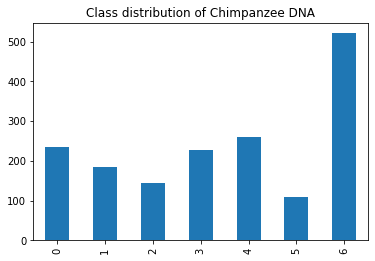

In [34]:
#display how many DNA sequences in each class of a chimpanzee data set? 
chimpanzee_dna['class'].value_counts().sort_index().plot.bar()
plt.title("Class distribution of Chimpanzee DNA")

Text(0.5, 1.0, 'Class distribution of Dog DNA')

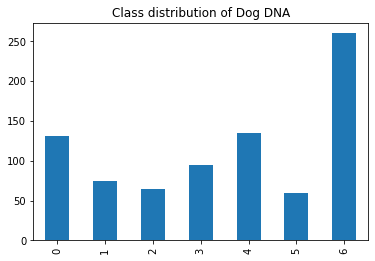

In [35]:
#dispaly how many DNA sequence in each class of a dog data set?
dog_dna['class'].value_counts().sort_index().plot.bar()
plt.title("Class distribution of Dog DNA")

# Data cleaning

In [5]:
#lets describe one dna sequence of human
one_dna = np.array(human_dna.head(1))
one_dna = str(one_dna).split(' ')
seq = one_dna[0].replace("[['",'')
seq = seq.replace("'",'')
print(seq)

ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCATACTCCTTACACTATTCCTCATCACCCAACTAAAAATATTAAACACAAACTACCACCTACCTCCCTCACCAAAGCCCATAAAAATAAAAAATTATAACAAACCCTGAGAACCAAAATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG



In [6]:
#create list of lovercase char and check if any char not in (a, c, g, t) put it as (z) char
import re
def string_to_array(seq_string):
    seq_string = seq_string.lower()
    seq_string = re.sub('[^acgt]', 'z', seq_string)
    seq_string = np.array(list(seq_string))
    return seq_string
string_to_array(seq)

array(['a', 't', 'g', 'c', 'c', 'c', 'c', 'a', 'a', 'c', 't', 'a', 'a',
       'a', 't', 'a', 'c', 't', 'a', 'c', 'c', 'g', 't', 'a', 't', 'g',
       'g', 'c', 'c', 'c', 'a', 'c', 'c', 'a', 't', 'a', 'a', 't', 't',
       'a', 'c', 'c', 'c', 'c', 'c', 'a', 't', 'a', 'c', 't', 'c', 'c',
       't', 't', 'a', 'c', 'a', 'c', 't', 'a', 't', 't', 'c', 'c', 't',
       'c', 'a', 't', 'c', 'a', 'c', 'c', 'c', 'a', 'a', 'c', 't', 'a',
       'a', 'a', 'a', 'a', 't', 'a', 't', 't', 'a', 'a', 'a', 'c', 'a',
       'c', 'a', 'a', 'a', 'c', 't', 'a', 'c', 'c', 'a', 'c', 'c', 't',
       'a', 'c', 'c', 't', 'c', 'c', 'c', 't', 'c', 'a', 'c', 'c', 'a',
       'a', 'a', 'g', 'c', 'c', 'c', 'a', 't', 'a', 'a', 'a', 'a', 'a',
       't', 'a', 'a', 'a', 'a', 'a', 'a', 't', 't', 'a', 't', 'a', 'a',
       'c', 'a', 'a', 'a', 'c', 'c', 'c', 't', 'g', 'a', 'g', 'a', 'a',
       'c', 'c', 'a', 'a', 'a', 'a', 't', 'g', 'a', 'a', 'c', 'g', 'a',
       'a', 'a', 'a', 't', 'c', 't', 'g', 't', 't', 'c', 'g', 'c

In [8]:
#apply kmers function to all datasets & join all words to list 
#then add words column & drop sequence column
def Kmers_funct(seq, size=6):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]

human_dna['words'] = human_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
human_dna = human_dna.drop('sequence', axis=1)

chimpanzee_dna['words'] = chimpanzee_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
chimpanzee_dna = chimpanzee_dna.drop('sequence', axis=1)

dog_dna['words'] = dog_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
dog_dna = dog_dna.drop('sequence', axis=1)
#show first 5 rows in human dataset
human_dna.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [9]:
#apply to human
human_texts = list(human_dna['words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
#separate labels
y_human = human_dna.iloc[:, 0].values # y_human for human_dna
#apply to chimpanzee
chimpanzee_texts = list(chimpanzee_dna['words'])
for item in range(len(chimpanzee_texts)):
    chimpanzee_texts[item] = ' '.join(chimpanzee_texts[item])
#separate labels
y_chim = chimpanzee_dna.iloc[:, 0].values # y_chim for chimp_dna
#apply to dog
dog_texts = list(dog_dna['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])
#separate labels
y_dog = dog_dna.iloc[:, 0].values  # y_dog for dog_dna
#show Human class labels as example
print(y_human)

[4 4 3 ... 6 6 6]


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4)) #The n-gram size of 4 is previously determined by testing
X_human = cv.fit_transform(human_texts)
X_chimpanzee = cv.transform(chimpanzee_texts)
X_dog = cv.transform(dog_texts)

print(X_human.shape)
print(X_chimpanzee.shape)
print(X_dog.shape)

(4380, 232414)
(1682, 232414)
(820, 232414)


In [20]:
# Splitting the human dataset into the training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_human,
                                                   y_human,
                                                   test_size = 0.20,
                                                   random_state=42)

### Multinomial Naive Bayes Classifier ###
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [21]:
y_pred = classifier.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print("Confusion matrix for predictions on human test DNA sequence\n")

print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))

def get_metrics(y_test, y_predicted):
   accuracy = accuracy_score(y_test, y_predicted)
   precision = precision_score(y_test, y_predicted, average='weighted')
   recall = recall_score(y_test, y_predicted, average='weighted')
   f1 = f1_score(y_test, y_predicted, average='weighted')
   return accuracy, precision, recall, f1
   
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)

print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix for predictions on human test DNA sequence

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    1   0    2
1           0  104   0    0    0   0    2
2           0    0  78    0    0   0    0
3           0    0   0  124    0   0    1
4           1    0   0    0  143   0    5
5           0    0   0    0    0  51    0
6           1    0   0    1    0   0  263
accuracy = 0.984 
precision = 0.984 
recall = 0.984 
f1 = 0.984


In [24]:
# Predicting the chimp, dog and worm sequences
y_pred_chimp = classifier.predict(X_chimpanzee)

In [25]:
# performance on chimpanzee genes
print("Confusion matrix for predictions on Chimpanzee test DNA sequence\n")
print(pd.crosstab(pd.Series(y_chim, name='Actual'), pd.Series(y_pred_chimp, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_chim, y_pred_chimp)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix for predictions on Chimpanzee test DNA sequence

Predicted    0    1    2    3    4    5    6
Actual                                      
0          232    0    0    0    0    0    2
1            0  184    0    0    0    0    1
2            0    0  144    0    0    0    0
3            0    0    0  227    0    0    1
4            2    0    0    0  254    0    5
5            0    0    0    0    0  109    0
6            0    0    0    0    0    0  521
accuracy = 0.993 
precision = 0.994 
recall = 0.993 
f1 = 0.993


In [26]:
y_pred_dog = classifier.predict(X_dog)

In [27]:
# performance on dog genes
print("Confusion matrix for predictions on Dog test DNA sequence\n")
print(pd.crosstab(pd.Series(y_dog, name='Actual'), pd.Series(y_pred_dog, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_dog, y_pred_dog)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix for predictions on Dog test DNA sequence

Predicted    0   1   2   3    4   5    6
Actual                                  
0          127   0   0   0    0   0    4
1            0  63   0   0    1   0   11
2            0   0  49   0    1   0   14
3            1   0   0  81    2   0   11
4            4   0   0   1  126   0    4
5            4   0   0   0    1  53    2
6            0   0   0   0    0   0  260
accuracy = 0.926 
precision = 0.934 
recall = 0.926 
f1 = 0.925
